# Regression

In [1]:
# https://github.com/JuliaAcademy/DataScience/blob/master/07.%20Regression.ipynb 

In [2]:
using Plots
using Statistics
using StatsBase
using PyCall
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
using LsqFit

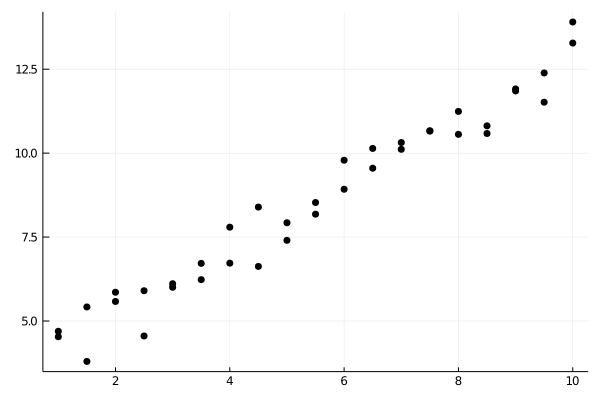

In [3]:
# Generate and plot a set of x,y pairs.
xvals = repeat(1:0.5:10,inner=2)
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals)) .-1
scatter(xvals,yvals,color=:black,leg=false)

In [4]:
# function to find best fit
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end

find_best_fit (generic function with 1 method)

In [5]:
# apply fitting function to pairs
a,b = find_best_fit(xvals,yvals)
ynew = a .* xvals .+ b

38-element Array{Float64,1}:
  4.266549515819558
  4.266549515819558
  4.7433248899415545
  4.7433248899415545
  5.220100264063552
  5.220100264063552
  5.696875638185549
  5.696875638185549
  6.1736510123075465
  6.1736510123075465
  6.650426386429544
  6.650426386429544
  7.127201760551541
  ⋮
 10.464629379405523
 10.464629379405523
 10.941404753527518
 10.941404753527518
 11.418180127649517
 11.418180127649517
 11.894955501771513
 11.894955501771513
 12.371730875893512
 12.371730875893512
 12.848506250015507
 12.848506250015507

In [6]:
np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/a.a.gonzalez.paje/.julia/conda/3/lib/python3.8/site-packages/numpy/__init__.py'>

In [ ]:
xdata = xvals
ydata = yvals
@time myfit = np.polyfit(xdata,ydata,1);
ynew2 = collect(xdata) .* myfit[1] .+